In [3]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from frozen_lake import frozenlake

episode 0
episode end at 25
episode end at 18
episode end at 26
episode end at 20
episode end at 10
episode end at 12
episode end at 8
episode end at 8
episode end at 30
episode end at 10
episode end at 7
episode end at 8
episode end at 8
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 7
episode end at 8
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 8
episode end at 8
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 7
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 14
episode end at 6
episode end at 8
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 7
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 8
episode end at 6
episode end at 8
episode end at 6
episode end at 8
episode end 

episode end at 8
episode end at 6
episode end at 6
episode end at 6
episode end at 7
episode end at 6
episode end at 7
episode end at 6
episode end at 6
episode end at 7
episode end at 6
episode end at 6
episode end at 7
episode end at 6
episode end at 8
episode end at 6
episode end at 7
episode end at 6
episode end at 6
episode end at 8
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 7
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 7
episode end at 9
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 7
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 7
episode 600
episode end at 6
episode end at 6
ep

episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 7
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 7
episode end at 7
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode 1100
episode end at 6
episode end at 6
episode end at 7
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 8
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 8
episode end at 6
episode end at 6
episode end at 6
episode end at 6
e

episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode 1600
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
e

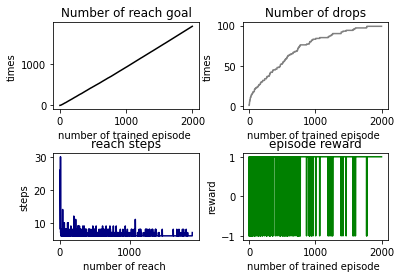

In [5]:
# choose differnt environment and algorithm
DECAY_LR = True
DECAY_E = True
VALID_A = False
SLIDE = False

# hyparameter setting
EPISODE_NUM = 2000
LR_END_DECAY = 1500
E_END_DECAY = 1500
GRID_NUM = 4
MAX_LR = 0.1
MIN_LR = 0.05
SDANDARD_LR = 0.1
END_E = 0.01
START_E = 0.1
SDANDARD_E = 0.1
SLIDE_P = 0.1


"""Sarsa is a online updating ,model free method for Reinforcement learning."""

class Sarsa(object):
    """create sarsa
       first create a Q table in which columns are action ,rows are state,values are Q to store information
       then use the function check_first_visit_state to append Q table
       use the function predict_action to ϵ greedy choose action when give state
       use the function update to update Q table
       """

    def __init__(self, possible_a=[0, 1, 2, 3], reward_decay=0.9, valid_a=False):
        """create a empty Q table and initialize algorithm"""
        if type(possible_a) is not list:
            raise ValueError('the columns of a DataFrame must be list')
        self.actions = possible_a
        self.valid_a = valid_a
        self.gamma = reward_decay
        # Create an empty table without states and Q value
        self.q_table = pd.DataFrame(columns=self.actions, dtype=np.float64)

    def check_first_visit_state(self, state):
        """check if the state already in Q table,
        if not,append it to Q table and set Q value of this new state are all 0,
        if already in, pass"""
        if state not in self.q_table.index:
            self.q_table = self.q_table.append(
                pd.Series([0] * len(self.actions), index=self.q_table.columns, name=state))

    def predict_action(self, state, epsilon, valid_action, greedy=False):
        """use ϵ greedy to explore states
         ensure that all actions are selected infinitely often."""
        self.check_first_visit_state(state)
        if greedy == False:
            if np.random.uniform() < epsilon:
                # With a probability of self.epsilon to random choose action
                if self.valid_a == True:
                    # only choose valid action
                    action = np.random.choice(valid_action)
                else:
                    action = np.random.choice(self.actions)
            else:
                # With a probability of 1-self.epsilon to choose best action
                if self.valid_a == True:
                    # only choose valid action
                    state_action = self.q_table.loc[state, valid_action]
                else:
                    state_action = self.q_table.loc[state, :]
                # chose a set of action with max Q value
                max_a = state_action[state_action == np.max(state_action)].index
                # some actions may have the same max Q value, so randomly choose on in these actions
                action = np.random.choice(max_a)
        else:
            # if donot use ϵ greedy then directly choose the best action
            if self.valid_a == True:
                state_action = self.q_table.loc[state, valid_action]
            else:
                state_action = self.q_table.loc[state, :]
            max_a = state_action[state_action == np.max(state_action)].index
            action = np.random.choice(max_a)
        return action

    def update(self, s, a, r, next_s, next_a, done, lr):
        """update q table"""
        self.check_first_visit_state(next_s)
        q_predict = self.q_table.loc[s, a]
        if done != True:
            # use reward+reward_decay*Q(next_state,next_action) as q_target
            q_target = r + self.gamma * self.q_table.loc[next_s, next_a]  # # next state is not terminal,can get Q(next_s,next_a)
        else:
            # state is terminal, so no Q(next_s,:)
            q_target = r
            # upadte use the rule Q(state,action)=Q(state,action)+learning rate(q_target - q_predict)
        self.q_table.loc[s, a] += lr * (q_target - q_predict)
        
        
def linear_anneal(current_episode, start=MAX_LR, stop=MIN_LR, steps=LR_END_DECAY):
    """from start decay to end with current_episode increase ,unchange after steps"""
    if current_episode <= steps:
        eps = stop + (start - stop) * (1 - current_episode / steps)
    else:
        eps = stop
    return eps


def main_update(policy):
    """train policy """
    # recode performance for compare
    record_r = []
    record_s = []
    record_reach = []
    record_f = []
    reach_goal = 0
    fall = 0
    env.render()
    for episode in range(EPISODE_NUM):
        done = False
        step = 0
        # initial environment and get a state at the beginning at each episode
        state = env.reset()
        episode_reward = 0
        if DECAY_LR == True:
            # learing rate decay
            lr = linear_anneal(episode)
        else:
            lr = SDANDARD_LR
        if DECAY_E == True:
            # ϵ decay
            epsilon = linear_anneal(episode, START_E, END_E, E_END_DECAY)
        else:
            epsilon = SDANDARD_E
        # do not end an eppisode unless done is true
        while not done:
            step += 1
            # ϵ greedy choose action based on state
            valid_a = env.validaction()
            action = policy.predict_action(state, epsilon, valid_a)
            env.render()
            # environment get action then return next state and reward done
            next_state, reward, done = env.step(action)
            # recode episode reward to compare performance
            episode_reward += reward
            # choose next_action based on next state
            valid_a = env.validaction()
            next_action = policy.predict_action(next_state, epsilon, valid_a)
            # learn from this transition (s, a, r, next_s, next_a)
            policy.update(state, action, reward, next_state, next_action, done, lr)
            # swap state
            state = next_state

            # recode the number of reach and fall when done==True
            if done:
                if reward == 1:
                    reach_goal += 1
                    record_s.append(step)
                    print('episode end at', step)
                if reward == -1:
                    fall += 1
        # record performance after each episode
        record_reach.append(reach_goal)
        record_f.append(fall)
        record_r.append(episode_reward)
        if episode % 100 == 0:
            print('episode', episode)
    # end of training
    reach_goal_p = (reach_goal / EPISODE_NUM) * 100
    fall_p = (fall / EPISODE_NUM) * 100
    print('reach goal probility is', reach_goal_p)
    print('fall probility is', fall_p)
    return record_reach, record_f, record_s, record_r, policy


def test_policy(policy):
    """use to test if policy can reach the goal """
    done = False
    state = env.reset()
    env.render()
    time.sleep(1)
    while not done:
        valid_a = env.validaction()
        action = policy.predict_action(state, epsilon=0.7, valid_action=valid_a, greedy=True)
        next_state, reward, done = env.step(action)
        env.render()
        time.sleep(1)
        state = next_state



if GRID_NUM == 4:
    env = frozenlake('4*4', slide=SLIDE, slide_p=SLIDE_P)
else:
    env = frozenlake('10*10', slide=SLIDE, slide_p=SLIDE_P)

policy = Sarsa(valid_a=VALID_A)
start = time.time()
record_reach, record_f, record_s, record_r, policy = main_update(policy)
end = time.time()
train_time = end - start
print('train over,training time is', train_time)
print(policy.q_table)

# plot figures
fig = plt.figure()
plt.subplots_adjust(wspace =0.3, hspace =0.5)
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.plot(range(EPISODE_NUM), record_reach, color='black')
ax1.set_title('Number of reach goal')
ax1.set_xlabel('number of trained episode ')
ax1.set_ylabel('times')

ax2.plot(range(EPISODE_NUM), record_f, color='gray')
ax2.set_title('Number of drops')
ax2.set_xlabel('number of trained episode ')
ax2.set_ylabel('times')

ax3.plot(range(len(record_s)), record_s, color='navy')
ax3.set_title('reach steps')
ax3.set_xlabel('number of reach ')
ax3.set_ylabel('steps')

ax4.plot(range(EPISODE_NUM), record_r, color='g')
ax4.set_title('episode reward')
ax4.set_xlabel('number of trained episode ')
ax4.set_ylabel('reward')

print('plot over')
plt.show()
test_policy(policy)